
Testing DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 892 to 1072
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1168 non-null   int64  
 1   mssubclass     1168 non-null   int64  
 2   mszoning       1168 non-null   object 
 3   lotfrontage    964 non-null    float64
 4   lotarea        1168 non-null   int64  
 5   street         1168 non-null   object 
 6   alley          70 non-null     object 
 7   lotshape       1168 non-null   object 
 8   landcontour    1168 non-null   object 
 9   utilities      1168 non-null   object 
 10  lotconfig      1168 non-null   object 
 11  landslope      1168 non-null   object 
 12  neighborhood   1168 non-null   object 
 13  condition1     1168 non-null   object 
 14  condition2     1168 non-null   object 
 15  bldgtype       1168 non-null   object 
 16  housestyle     1168 non-null   object 
 17  overallqual    1168 non-null   int6

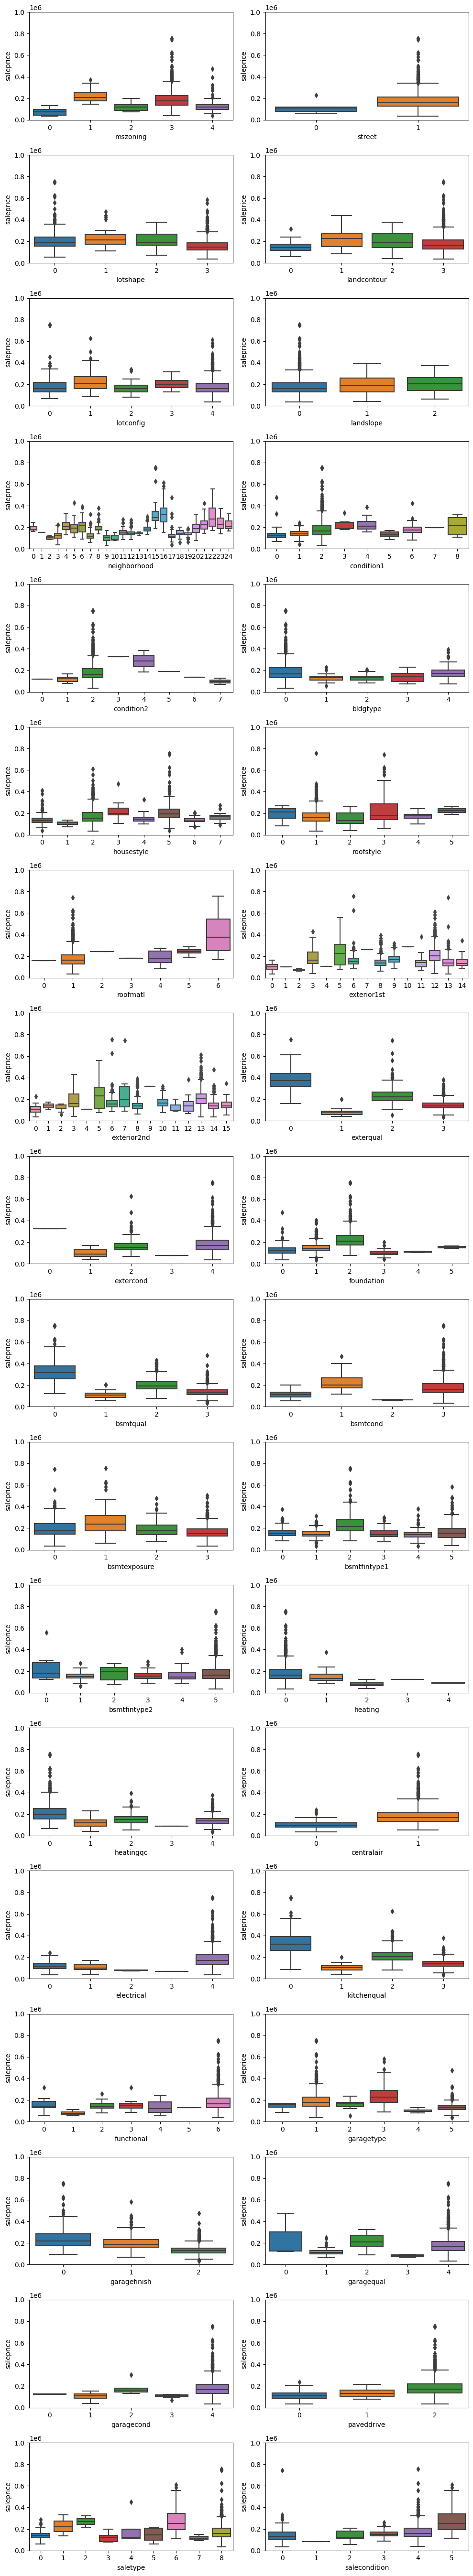

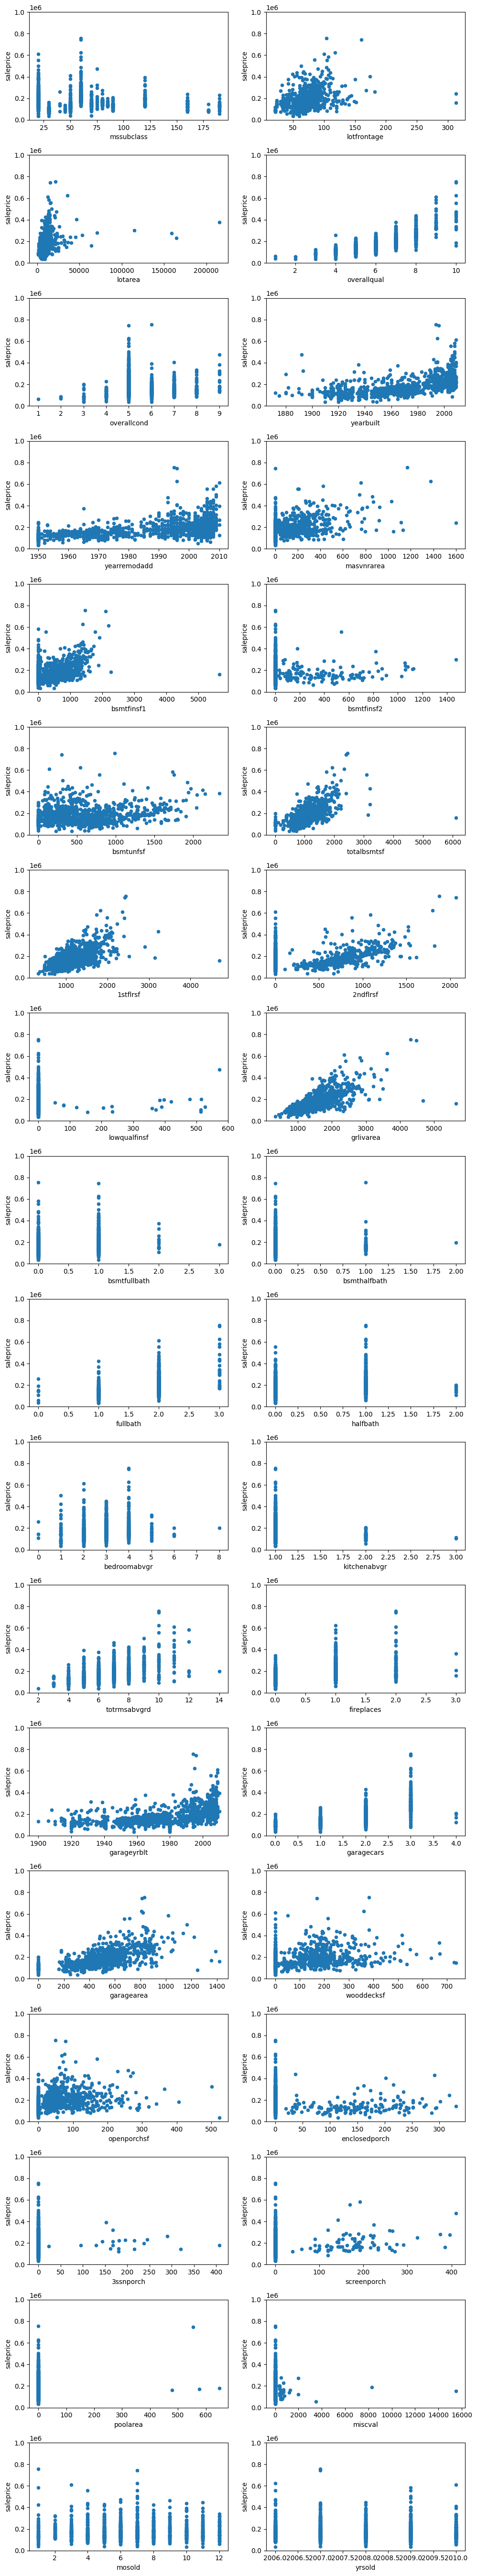

231
263
Learning rate set to 0.040504
0:	learn: 0.3993661	total: 59.6ms	remaining: 59.5s
1:	learn: 0.3895287	total: 64.4ms	remaining: 32.1s
2:	learn: 0.3805053	total: 68.5ms	remaining: 22.8s
3:	learn: 0.3708689	total: 72.4ms	remaining: 18s
4:	learn: 0.3623686	total: 76.6ms	remaining: 15.2s
5:	learn: 0.3541891	total: 80.4ms	remaining: 13.3s
6:	learn: 0.3456371	total: 84.2ms	remaining: 11.9s
7:	learn: 0.3377737	total: 88ms	remaining: 10.9s
8:	learn: 0.3294804	total: 92ms	remaining: 10.1s
9:	learn: 0.3218939	total: 95.9ms	remaining: 9.49s
10:	learn: 0.3143780	total: 99.8ms	remaining: 8.98s
11:	learn: 0.3070830	total: 104ms	remaining: 8.54s
12:	learn: 0.3003316	total: 109ms	remaining: 8.3s
13:	learn: 0.2940988	total: 113ms	remaining: 7.99s
14:	learn: 0.2885898	total: 117ms	remaining: 7.71s
15:	learn: 0.2823166	total: 121ms	remaining: 7.45s
16:	learn: 0.2762097	total: 125ms	remaining: 7.24s
17:	learn: 0.2705281	total: 129ms	remaining: 7.04s
18:	learn: 0.2652638	total: 133ms	remaining: 6.85s

,Id,SalePrice
0,1461,123644.017866
1,1462,161168.385149
2,1463,189314.596323
3,1464,196163.748028
4,1465,177903.914954
5,1466,174222.800917
6,1467,172457.967449
7,1468,165507.120802
8,1469,191598.992553
9,1470,125821.023463


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error


from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew, boxcox
from scipy.stats import probplot
from scipy.stats.mstats import winsorize

import optuna
import seaborn as sns
import numpy as np
import math
import scipy.stats as ss

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
!pip install optuna

df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Step 2: Split the DataFrame into training and testing sets
# Set a seed for reproducibility
np.random.seed(42)

# Generate random indices for splitting
indices = np.random.permutation(df.index)
split_ratio = 0.8  # 80% training, 20% testing

# Calculate the split index
split_index = int(len(indices) * split_ratio)

# Split the indices into training and testing sets
train_indices, test_indices = indices[:split_index], indices[split_index:]

# Step 3: Create training and testing DataFrames
df_train = df.loc[train_indices]
df_train.columns = df_train.columns.str.lower().str.replace(' ', '_')
df_test = df.loc[test_indices]
df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')

# # Step 4: Your training and testing DataFrames are ready
# print("Training DataFrame:")
# df_train.head()

print("\nTesting DataFrame:")
df_test.head()


print(df_train.info())
df_train.describe()


print(df_train.info())
df_test.describe()



def nullWithPercent(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  return missing_data
nullWithPercent(df_train).head(10)

nullWithPercent(df_test).head(10)

dropped_featuers=['id','fireplacequ','poolqc','miscfeature','alley','fence','masvnrtype','utilities']

df_train=df_train.drop(columns=dropped_featuers)
df_test=df_test.drop(columns=dropped_featuers)
# nullWithPercent(df_train).index.tolist()
temp=nullWithPercent(df_train)

nulled_items=temp[temp['Percent'] > 0].index.tolist()
nulled_items

def get_feature_types(data):
  
    numeric_features = data.select_dtypes(include=['int', 'float','float64','int64']).columns.tolist()
    datetime_features = data.select_dtypes(include=['datetime64']).columns.tolist()
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()

    return numeric_features, datetime_features, categorical_features


target='saleprice'
num_featuers, datetime_feats, cat_featuers = get_feature_types(df_train)
num_featuers.remove(target)
print(len(num_featuers))
print(len(datetime_feats))
print(len(cat_featuers))
print(len(df_train.columns))

    
def numeric_null_Handle(df,feature):
    ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='median')
    X=df[feature].values.reshape(-1, 1)
    ImputedX = ImputedModule.fit(X)
    X = ImputedX.transform(X)
    df[feature]=X
    
def nan_handle(df):
    
    for i2 in list(set(cat_featuers) & set(nulled_items)):
        df[i2] = df[i2].fillna(df[i2].mode()[0])
#          df[i2]=categ_nan_handle(df,i2) 
            
            
    for i in list(set(num_featuers) & set(nulled_items)) :
        numeric_null_Handle(df,i)   
nan_handle(df_train)
nan_handle(df_test)

nullWithPercent(df_train).head(5)

df_temp= pd.DataFrame()
df_temp[target]=df_train[target].values

le = LabelEncoder()

for col in cat_featuers:
    df_temp[col] = le.fit_transform(df_train[col]).astype(int)
    
    
count_features = len(cat_featuers)
num_cols = 2  # Number of columns for subplots
num_rows = (count_features + 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows))

for i, var in enumerate(cat_featuers):
#     row = 0

    row = i // num_cols
    col = i % num_cols
    
    data = pd.concat([df_temp[target], df_temp[var]], axis=1)
    sns.boxplot(x=var, y=target, data=data, ax=axes[row, col])
    axes[row, col].set_ylim(0, 1000000)  # Set y-axis limits
    
plt.tight_layout()
plt.show()


# le = LabelEncoder()
dummies = pd.get_dummies(df_train[cat_featuers])
df_train = pd.concat([df_train, dummies], axis=1)
df_train=df_train.drop(columns=cat_featuers)


dummies = pd.get_dummies(df_test[cat_featuers])
df_test = pd.concat([df_test, dummies], axis=1)
df_test=df_test.drop(columns=cat_featuers)
    
# Visualize num_featuers
count_features = len(num_featuers)
num_cols = 2  # Number of columns for subplots
num_rows = (count_features + 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows))

for i, var in enumerate(num_featuers):
#     row = 0

    row = i // num_cols
    col = i % num_cols
    
    data = pd.concat([df_train[target], df_train[var]], axis=1)
    data.plot.scatter(x=var, y=target,  ax=axes[row, col])
#     sns.boxplot(x=var, y=target, data=data, ax=axes[row, col])
    axes[row, col].set_ylim(0, 1000000)  # Set y-axis limits
    
plt.tight_layout()
plt.show()

def fix_outliers(df_data):
    df=df_data.copy()

    
    df.loc[(df['lotfrontage'] >200) & (df[target] > 0  ) & (df[target] <= 400000), 'lotfrontage'] = 200
    
    df.loc[(df['bsmtfinsf1'] >2500) & (df[target] > 0  ) & (df[target] <= 400000), 'bsmtfinsf1'] = 2500
    
    df.loc[(df['totalbsmtsf'] >3500) & (df[target] > 0  ) & (df[target] <= 400000), 'totalbsmtsf'] = 3500
    
    df.loc[(df['1stflrsf'] >3500) & (df[target] > 0  ) & (df[target] <= 400000), '1stflrsf'] = 3500
    
    df.loc[(df['grlivarea'] >4500) & (df[target] > 0  ) & (df[target] <= 400000), 'grlivarea'] = 4500

    
    return df
df_train=fix_outliers(df_train).copy()
df_test=fix_outliers(df_test).copy()

df_train[target]=np.log(df_train[target])
df_test[target]=np.log(df_test[target])
df_train.corr()[target].sort_values(ascending=False)

print(len(set(df_test.columns)))
print(len(set(df_train.columns)))

_picked_cols=list(set(df_test.columns) & set(df_train.columns))

_picked_cols.remove(target)

# Get Important Features
X = df_train[_picked_cols]
y = df_train[target] # Target variable


# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training
model = CatBoostRegressor()
model.fit(X_train, y_train)

# Step 5: Feature Importance
feature_importance = model.get_feature_importance()

# Step 6: Select Important Features
# Assuming you want to select features with importance above a certain threshold
threshold = 0.03
important_features_indices = [i for i, importance in enumerate(feature_importance) if importance > threshold]
important_features = X.columns[important_features_indices]

important_features

X_train, X_valid, y_train, y_valid = df_train[important_features], df_train[target], df_test[important_features], df_test[target]
catboost_params ={'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 5,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}
model = CatBoostRegressor(**catboost_params)
 
# Fit the model on the training data with verbose logging every 100 iterations
model.fit(X_train, X_valid, verbose=100)


from sklearn.metrics import mean_squared_error as mse
 
# Generate predictions on the training and validation sets using the trained 'model'
y_train = model.predict(X_train)
y_val = model.predict(df_test[important_features])
# print(y_val)
print("Training RMSE: ", np.sqrt(mse(X_valid, y_train)))
print("Validation RMSE: ", np.sqrt(mse(y_valid,y_val )))


print("Validation RMSE: ", np.sqrt(mean_squared_log_error(y_valid , y_val)))

data = {
    'prid': y_valid,
    'values': y_val 
}


new_df = pd.DataFrame(data)
new_df


def preprocess_test(df):
    
    # drop more than 50% null featuers & id featuer
    df=df.drop(columns=dropped_featuers)
    
    # handle null 
    nan_handle(df)
    

    dummies = pd.get_dummies(df[cat_featuers])
    df = pd.concat([df, dummies], axis=1)
    df=df.drop(columns=cat_featuers)
    


    return df   
df_t = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_t.columns = df_t.columns.str.lower().str.replace(' ', '_')

subb_df=preprocess_test(df_t).copy()


y_pred_test = model.predict(subb_df[important_features].values)
# np.exp(y_pred_test)
df_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
df_submission['SalePrice']=np.exp(y_pred_test)
df_submission.to_csv("submission.csv", index=False)
df_submission.head(10)